Model Performance Metrics:
------------------------------
R-squared Score (Test): -0.6995
Root Mean Squared Error: 12.3847

Model Coefficients:
------------------------------
  Feature  Coefficient
0      SO     0.025895
1      BB     0.015760
2      SB     0.027856
3     HRA    -0.054471
4     ERA    -0.000568

Intercept: 39.9565


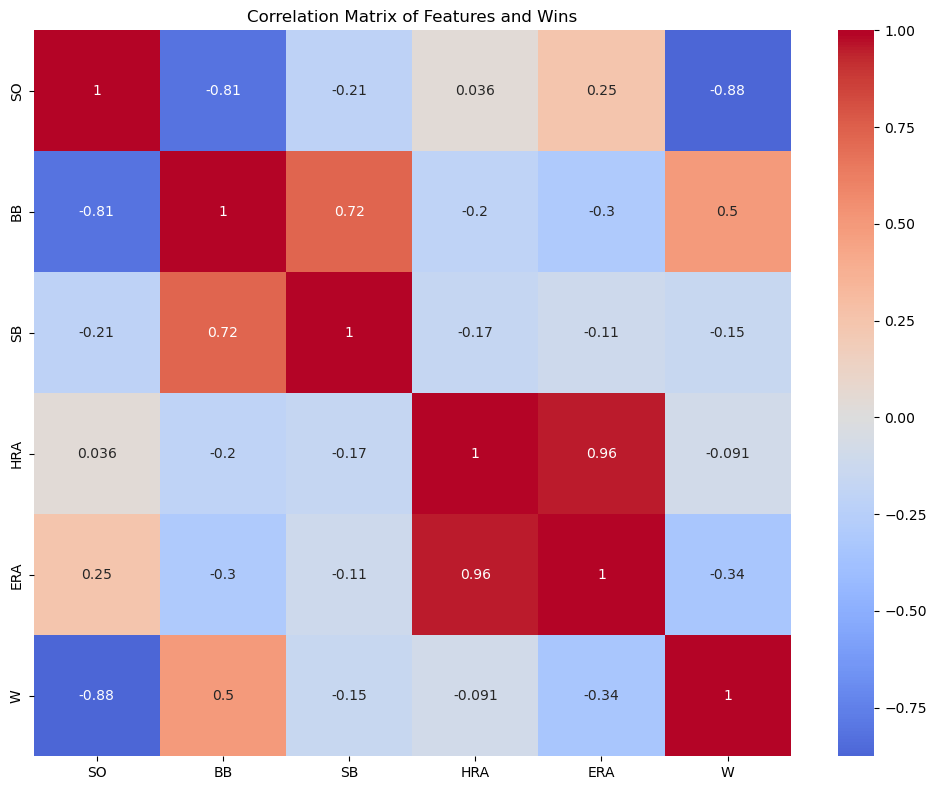

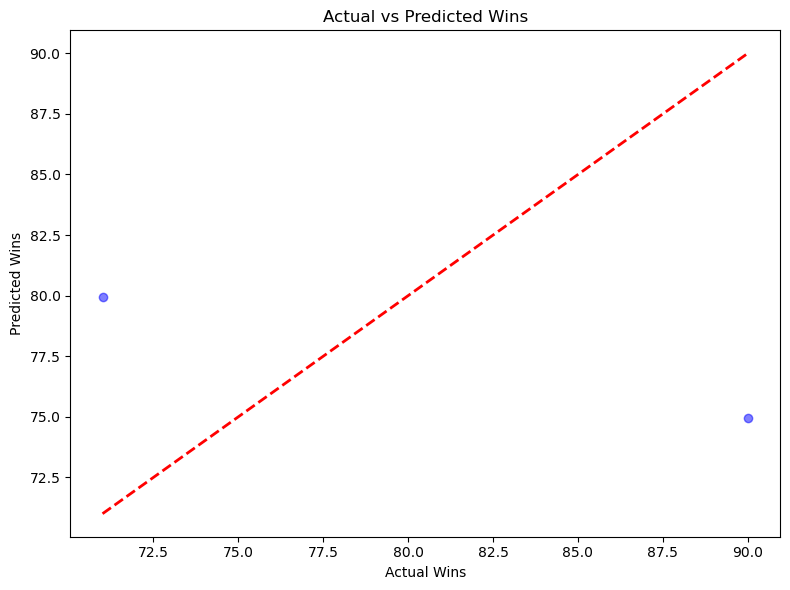


Summary Statistics (2010-2015):
------------------------------
            yearID          W           SO          BB          SB  \
count     6.000000   6.000000     6.000000    6.000000    6.000000   
mean   2012.500000  77.333333  1278.500000  489.833333  123.333333   
std       1.870829   6.562520    56.578264   44.575404   34.535006   
min    2010.000000  71.000000  1183.000000  426.000000   82.000000   
25%    2011.250000  74.500000  1252.000000  467.250000   97.750000   
50%    2012.500000  76.000000  1301.500000  484.500000  121.000000   
75%    2013.750000  76.750000  1317.250000  528.750000  147.250000   
max    2015.000000  90.000000  1327.000000  539.000000  170.000000   

              HRA       ERA  
count    6.000000  6.000000  
mean   145.000000  3.693333  
std     21.475568  0.370333  
min    117.000000  3.270000  
25%    128.500000  3.397500  
50%    147.500000  3.700000  
75%    160.500000  4.002500  
max    171.000000  4.090000  

Yearly Wins:
---------------------

In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('/Users/becky/OneDrive/Documents/Classes/AAI500/Final/Data/Teams.csv')

# Filter data for San Diego Padres from 2010-2015
sdp_data = df[(df['yearID'].between(2010, 2015)) & (df['franchID'] == 'SDP')]

# Select features (X) and target variable (y)
X = sdp_data[['SO', 'BB', 'SB', 'HRA', 'ERA']]
y = sdp_data['W']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Print results
print("Model Performance Metrics:")
print("-" * 30)
print(f"R-squared Score (Test): {r2_score(y_test, y_pred):.4f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# Create DataFrame with coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nModel Coefficients:")
print("-" * 30)
print(coef_df)

print(f"\nIntercept: {model.intercept_:.4f}")

# Create correlation matrix visualization
plt.figure(figsize=(10, 8))
correlation_matrix = sdp_data[['SO', 'BB', 'SB', 'HRA', 'ERA', 'W']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features and Wins')
plt.tight_layout()
plt.show()

# Create actual vs predicted plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.title('Actual vs Predicted Wins')
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics (2010-2015):")
print("-" * 30)
print(sdp_data[['yearID', 'W', 'SO', 'BB', 'SB', 'HRA', 'ERA']].describe())

# Print yearly wins
print("\nYearly Wins:")
print("-" * 30)
print(sdp_data[['yearID', 'W']].set_index('yearID'))


In [ ]:
#Utilized ChatGPT to to fix logical in scatter plot and data frame for coeffients.
# In addition utilized to fix syntax errors.
#OpenAI, personal communication, February 20, 2025

In [ ]:
#References:
#OpenAI. (2024). ChatGPT (Feb 10 version) [Large language model]. https://openai.com/chatgpt